<a href="https://colab.research.google.com/github/SanjayBista1010/PyTorch/blob/main/TrainTestinBatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

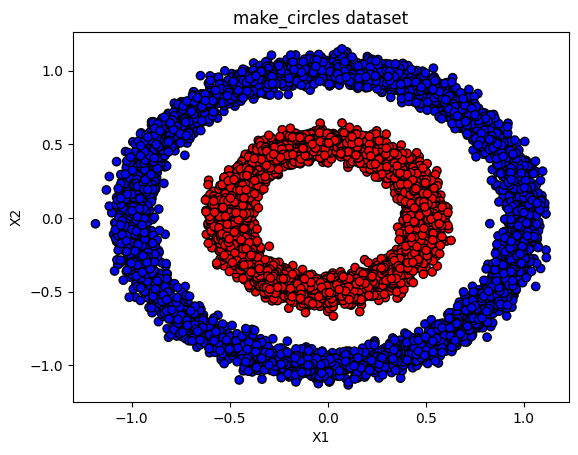

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate 2D circular dataset
X, y = make_circles(n_samples=10000,      # total number of points
                    factor=0.5,        # scale factor between inner and outer circle
                    noise=0.05,        # standard deviation of Gaussian noise
                    random_state=42)
# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("make_circles dataset")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
  def __init__(self, X,y ):
    self.X = torch.from_numpy(X.astype(np.float32))
    self.y = torch.from_numpy(y.astype(np.float32))
    self.len = self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

batch_size = 64

train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

for batch, (X,y) in enumerate(train_dataloader):
  print(f'Batch:{batch+1}')
  print(f'X shape: {X.shape}')
  print(f'y shape: {y.shape}')
  break

Batch:1
X shape: torch.Size([64, 2])
y shape: torch.Size([64])


In [10]:
from torch import nn, optim

input_dim = 2
hidden_dim = 10
output_dim = 1

class NeuralNetwork(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()
    self.layer_1 = nn.Linear(input_dim, hidden_dim)
    nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity='relu')
    self.layer_2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x= torch.nn.functional.relu(self.layer_1(x))
    x= torch.nn.functional.sigmoid(self.layer_2(x))

    return x

model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [11]:
learning_rate = 0.1

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [13]:
num_epochs = 100
loss_values = []

for epoch in range (num_epochs):
  for X, y in train_dataloader:
    '''zero gradient for each loop else accumulation of gradiants'''
    optimizer.zero_grad()
    #forward+backward+optimization
    pred = model(X)
    loss = loss_fn(pred, y.unsqueeze(-1))
    loss_values.append(loss.item())
    loss.backward()
    optimizer.step()

In [14]:
print('Training Complete')

Training Complete


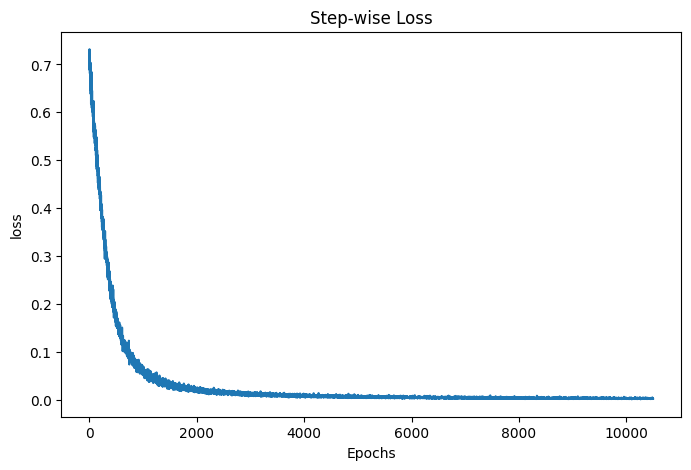

In [16]:
step = range(len(loss_values))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title('Step-wise Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()